# GROUP 4
## Haripriya S|Saurabh Gupta|Ramandeep Sharma

# Exploratory Data Analysis - Attrition Dataset

### Lets import some required packages*
*Please upgrade your packages if any of the visuals throw error as we move along with the notebook

In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Let's (just) see our Attrition Data

In [2]:
# load the dataset  (which is in csv format)
Attrition_Data=pd.read_csv("attrition.csv")
# Just have a high level view of data (by selecting head)
Attrition_Data.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


### Further lets see the spread and some numbers that can help us to give an overview of variables

In [3]:
# For Non-Object (stored as numbers) variables
Attrition_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.0,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


In [4]:
# For object  (stored as strings) variables
Attrition_Data.describe(include='object').T

,count,unique,top,freq
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


#### Some Data manipulation on our Attrition data

> Creating grouped version of variables Age and Distance from Home

> Bucketing younger and elder people to see their behaviour across other variables would be meaningful

> Similarly, Considering 1,2,3 & 4 as the distances near to office, grouping makes more sense

> Similarly grouping Total working years into suitable buckets

In [5]:
# using cut method of pandas to bucket features
Attrition_Data['Age_grp']=pd.cut(Attrition_Data.Age,bins=[17,25,35,45,60],labels=['18-25','26-35','36-45','46-60'])
Attrition_Data['Dist_grp']=pd.cut(Attrition_Data.DistanceFromHome,bins=[0,4,10,17,29],labels=['1-4','5-10','11-17','>17'])
Attrition_Data['Working_yrs_grp']=pd.cut(Attrition_Data.TotalWorkingYears,bins=[-1,2,6,12,20,40],labels=['0-2','3-6','7-12','13-20','>20'])
Attrition_Data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome', 'Age_grp', 'Dist_grp', 'Working_yrs_grp'],
      dtype='object')

### Identifying associations between suitable variables and target variable ATTRITION

# Hypothesis 1 : for the variable Age (Age Group) 
> Older people stay in the company seeking retirement while younger people tend to change companies for better career prospects

Proportion of people divided on Attrition= 0 & 1 for variable 'Age'

In [6]:
# using pandas crosstab to see the proportion given that Attrition = 0 and 1
(pd.crosstab(index=Attrition_Data['Attrition'], columns=Attrition_Data['Age_grp'],margins=True,normalize='index')*100).round(2)

Age_grp,18-25,26-35,36-45,46-60
Attrition,,,,
0,6.41,39.74,34.47,19.38
1,18.57,48.95,18.14,14.35
All,18.57,31.84,8.37,41.22


 Let's visualise above numbers in a bar graph

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

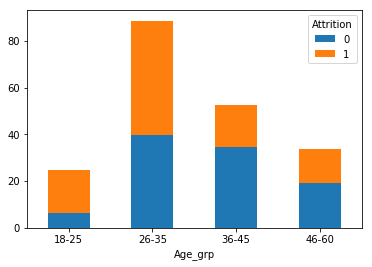

In [9]:
# plotting above figures with some modification to bring out a better plot
(pd.crosstab(index=Attrition_Data['Age_grp'], columns=Attrition_Data['Attrition'],normalize='columns')*100).round(2).plot(kind='bar',stacked=True)
plt.xticks(rotation=360)

* **People in Age group of 26-35 showed highest attrition compared to other age groups**
* **Comparing people who stayed and the ones who left, those higher than age 36 tend to stay in the company, hence justifying the hypothesis**

### Conclusively, we can say that there is a strong association (visually) between age and attrition, hence above hypothesis can be accepted

---

# Hypothesis 2: for variable Gender
>Females tend to leave the company more than males 

Proportion of people divided on Attrition= 0 & 1 for 'Gender'

In [10]:
# using pandas crosstab to see the proportion given that Attrition = 0 and 1
(pd.crosstab(index=Attrition_Data['Attrition'], columns=Attrition_Data['Gender'],margins=True,normalize='index')*100).round(2)

Gender,Female,Male
Attrition,,
0,40.63,59.37
1,36.71,63.29
All,40.00,60.00


Let's visualise above numbers in a bar graph

(array([0, 1]), <a list of 2 Text xticklabel objects>)

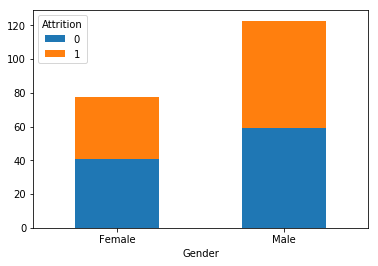

In [11]:
# plotting above figures with some modification to bring out a better plot
(pd.crosstab(index=Attrition_Data['Gender'], columns=Attrition_Data['Attrition'],normalize='columns')*100).round(2).plot(kind='bar',stacked=True)
plt.xticks(rotation=360)

* **We can't see any significant variations between both the genders that can lead to attrition**
#### Lets see the bi-variate relationship of Gender with Distance from Home field (grouped) with another sub-hypothesis that females tend to leave company if it's far from home to take care of family

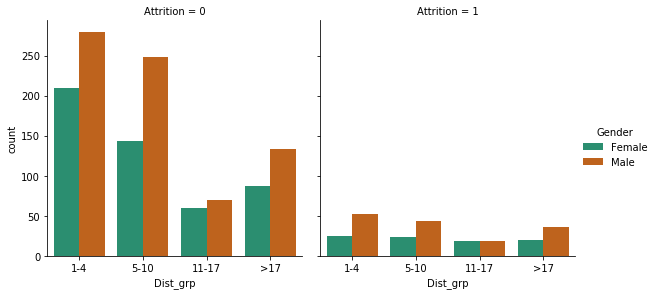

In [12]:
# using seaborn method catplot as a method to plot counts
sns.catplot(x="Dist_grp", kind="count", hue='Gender',col='Attrition',height=4,palette="Dark2", data=Attrition_Data)

* **There is no strong associaton (visually) between gender variable and attrition as per the graphs
####  Hence, the above hypothesis is rejected
---

Let's see if Monthly income affects attrition
# Hypothesis 3: for variable Monthly Income 
> people with less income choose to change company seeking better pay

Distribution of 'Monthly Income' for people divided on Attrition= 0 & 1

In [13]:
# describing monthly income of people for each category under Attrition i.e. 0 & 1 using group by
Attrition_Data.groupby(Attrition_Data['Attrition'])['MonthlyIncome'].describe().T

Attrition,0,1
count,1233.000000,237.000000
mean,6832.739659,4787.092827
std,4818.208001,3640.210367
min,1051.000000,1009.000000
25%,3211.000000,2373.000000
50%,5204.000000,3202.000000
75%,8834.000000,5916.000000
max,19999.000000,19859.000000


* **Those who left have a lower average salary than those who stayed.**

Let's visualise some of the above numbers in a graph

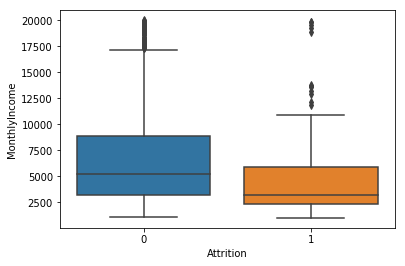

In [14]:
# boxplot method from seaborn showing distribution between attrition and monthly income
sns.boxplot(data=Attrition_Data, x='Attrition', y='MonthlyIncome')

* **Visually, the median salary of those who left is approximately equal to the 25th percentile salary of those who stayed**


#### Let's look into it further and see how it changes with other variables like Age and Gender.

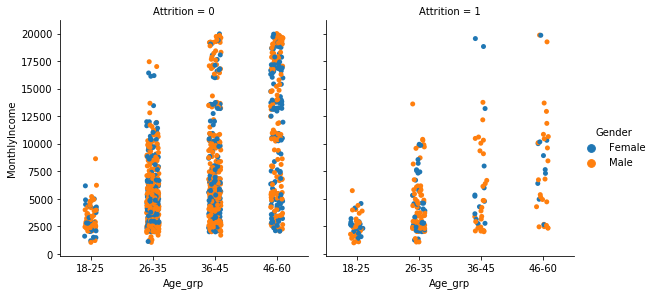

In [15]:
# strip plot from seaborn showing distribution between age group and monthly income
sns.catplot(x='Age_grp',y='MonthlyIncome',hue='Gender',height=4,col='Attrition',kind='strip',data=Attrition_Data)

* **With the above graph, it's quite evident that the people who left, in the higher age groups, are not paid more**
#### Hence, above the stated Hypothesis that Monthly income has strong association (visually) with Attrition variable is true.
---

#  Hypothesis 4: for variable Martial Status
> Single people tend to show higher attrition than the rest

Let's see proportion of people divided on Attrition= 0 & 1 for the variable 'Marital Status'

In [16]:
# using pandas crosstab to see the proportion given that Attrition = 0 and 1
(pd.crosstab(index=Attrition_Data['Attrition'], columns=Attrition_Data['MaritalStatus'],margins=True,normalize='index')*100).round(2)

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,23.84,47.77,28.39
1,13.92,35.44,50.63
All,22.24,45.78,31.97


Let's visualise above numbers in a bar graph

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

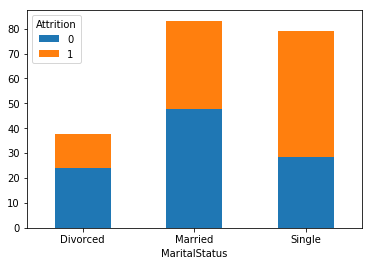

In [17]:
# plotting above figures with some modification to bring out a better plot
(pd.crosstab(index=Attrition_Data['MaritalStatus'], columns=Attrition_Data['Attrition'],normalize='columns')*100).round(2).plot(kind='bar',stacked=True)
plt.xticks(rotation=360)

* **Voila! Looks like our hypothesis for single people is true**
* **It's quite evident that more Married people are the one's to stay while Single appear to leave early**
#### Let's visualise by adding more variations with few other variables


#### Lets see how Attrition varies with Age group & Marital status as younger people are usually single

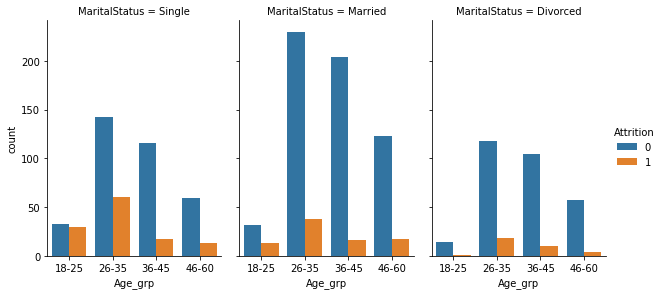

In [18]:
# using seaborn method catplot as a method to plot counts
sns.catplot(x="Age_grp", hue="Attrition", col="MaritalStatus",
                data=Attrition_Data, kind="count",
                height=4, aspect=.7);

Observations from above graph:
1. In the younger age bracket,among all those who left, single people showed higher attrition 
2. In age group 26-35,among all those who stayed, married people tend to stay more 
3. Beyond age group 35, almost equal proportion of people left irrespective of being single or married, yet the proportion of married people among those who stayed remains high

* **Above graph also supports our hypothesis that married people tend to stay than single people**
### Hence accepting the hypothesis (from visual interpretation)
---

# Hypothesis 5: for the variable Job Level
> People at lower job levels are seeking promotions

Let's see proportion of people divided on Attrition= 0 & 1 for the variable

In [19]:
# using pandas crosstab to see the proportion given that Attrition = 0 and 1
(pd.crosstab(index=Attrition_Data['Attrition'], columns=Attrition_Data['JobLevel'],margins=True,normalize='index')*100).round(2)

JobLevel,1,2,3,4,5
Attrition,,,,,
0,32.44,39.09,15.09,8.19,5.19
1,60.34,21.94,13.50,2.11,2.11
All,36.94,36.33,14.83,7.21,4.69


Let's visualise the above numbers in a bar graph

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

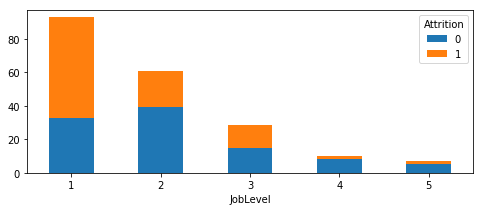

In [25]:
# plotting above figures with some modification to bring out a better plot
(pd.crosstab(index=Attrition_Data['JobLevel'], columns=Attrition_Data['Attrition'],normalize='columns')*100).round(2).plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=360)

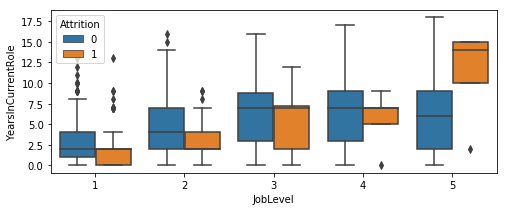

In [22]:
# boxplot method from seaborn showing multi-variate distribution
sns.boxplot(data=Attrition_Data, x='JobLevel', y='YearsInCurrentRole',hue='Attrition')

* **In job level 1 and 2, where people are in their early career stage, they appear to be leaving after working for around 1 - 3 years in same role, seeking promotion due to job change**
* **Attrition at job level 5 indicates those who might be retiring from service**

* **The distribution shows the peaking attrition at Job Level 1**

Let's see a type of frequency (Kernel density estimate) plot as well to observe the impact

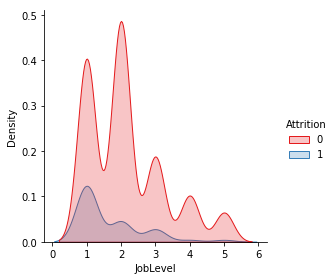

In [23]:
# seaborn method of plotting distribution 
# Here, KDE is smoothed version of histogram showing relative variation
sns.displot(data=Attrition_Data,x='JobLevel',hue='Attrition',kind='kde',height=4,fill=True,palette='Set1')

* **The above bar graph and visual interpretation (i.e. at Job Level 2, there's a significant variation) also supports our hypothesis**
### Hence the hypothesis is accepted that people in early years of their career appear to be seeking other opportunities

---

# Hypothesis 6: for the variable Distance from Home (grouped) 
>People who stay far from office tend to move out seeking opportunities near their houses

In [26]:
# using pandas crosstab to see the proportion given that Attrition = 0 and 1
(pd.crosstab(index=Attrition_Data['Attrition'], columns=Attrition_Data['Dist_grp'],margins=True,normalize='index')*100).round(2)

Dist_grp,1-4,5-10,11-17,>17
Attrition,,,,
0,39.74,31.79,10.54,17.92
1,32.49,28.27,15.61,23.63
All,38.57,31.22,18.84,11.36


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

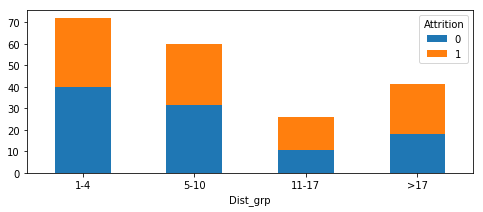

In [27]:
# plotting above figures with some modification to bring out a better plot
(pd.crosstab(index=Attrition_Data['Dist_grp'], columns=Attrition_Data['Attrition'],normalize='columns')*100).round(2).plot(kind='bar',stacked=True)
plt.xticks(rotation=360)

* **There doesn't appear to be a significant impact on attrition from the variable, as the proportion of those who left to the who stayes, appears to be similar across the groups**

#### Hence, rejecting the above stated Hypothesis based of the association (visual) observed from the data
---

# Hypothesis 7: for the variable OverTime
>People who are doing overtime would tend to look for a change

In [28]:
# using pandas crosstab to see the proportion given that Attrition = 0 and 1
(pd.crosstab(index=Attrition_Data['Attrition'], columns=Attrition_Data['OverTime'],margins=True,normalize='index')*100).round(2)

OverTime,No,Yes
Attrition,,
0,76.56,23.44
1,46.41,53.59
All,71.70,28.30


(array([0, 1]), <a list of 2 Text xticklabel objects>)

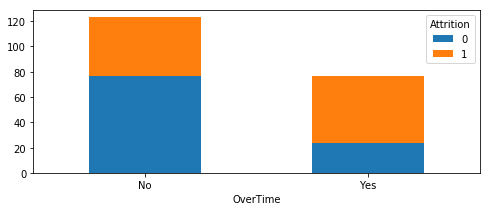

In [29]:
# plotting above figures with some modification to bring out a better plot
(pd.crosstab(index=Attrition_Data['OverTime'], columns=Attrition_Data['Attrition'],normalize='columns')*100).round(2).plot(kind='bar',stacked=True)
plt.xticks(rotation=360)

* **Above proportions support our stated hypothesis**

**Lets see if people who are doing overtime are paid higher or not?**

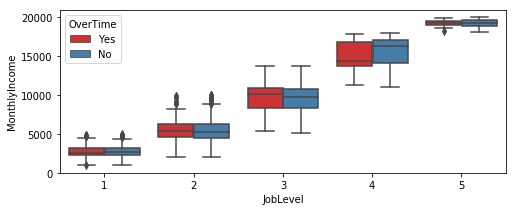

In [30]:
# boxplot method from seaborn showing distribution between job level and monthly income
sns.boxplot(data=Attrition_Data, x='JobLevel', y='MonthlyIncome', hue='OverTime',palette='Set1')

**From above visual, we observe that:**
* **At job level 4, those who are doing overtime are being paid much less than those who are not doing overtime**
* **Across the other job levels those who are doing overtime are being paid almost the same as those who are not doing overtime**
* **Hence it appears that there isn't much monetary incentive for those who undertake OverTime**

#### Hence the above Hypothesis is accepted since it is showing the association (visually) of the variable Overtime with Attrition
---

# Hypothesis 8: for the variable TotalWorkingYears
> People with lesser experience might be moving out of the company seeking better options

In [31]:
# using pandas crosstab to see the proportion given that Attrition = 0 and 1
pd.crosstab(Attrition_Data['Attrition'],Attrition_Data['Working_yrs_grp'], normalize='index')

Working_yrs_grp,0-2,3-6,7-12,13-20,>20
Attrition,,,,,
0,0.055961,0.210057,0.393350,0.185726,0.154907
1,0.227848,0.248945,0.341772,0.113924,0.067511


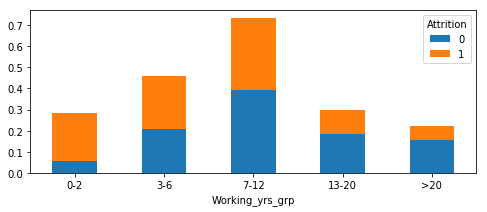

In [32]:
# plotting above figures with some modification to bring out a better plot
pd.crosstab(index=Attrition_Data['Working_yrs_grp'],columns=Attrition_Data['Attrition'], normalize='columns').plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"] = (8,4)
plt.xticks(rotation=360)
plt.show()

* **Among those in the Total Working Years age group 0-2 we see maximum atrition, with the next highest proportion seen in the 3-6 years group**

<Figure size 1080x576 with 0 Axes>

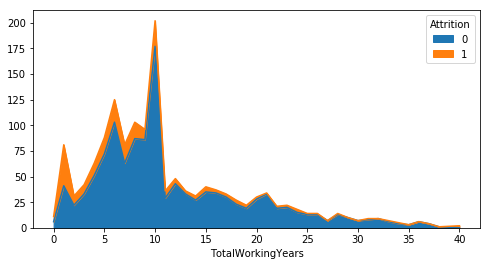

In [33]:
plt.figure(figsize=(15,8))
pd.crosstab(Attrition_Data['TotalWorkingYears'],Attrition_Data['Attrition']).plot(kind='area', stacked=True)

**From above visual, people with less than 8 years (approx) experience tend to move out**



#### Hence the hypothesis is accepted since people in their early years of career appear to be seeking other opportunities

### Lets explore other year type variables how they interact and show distribution for Attrition

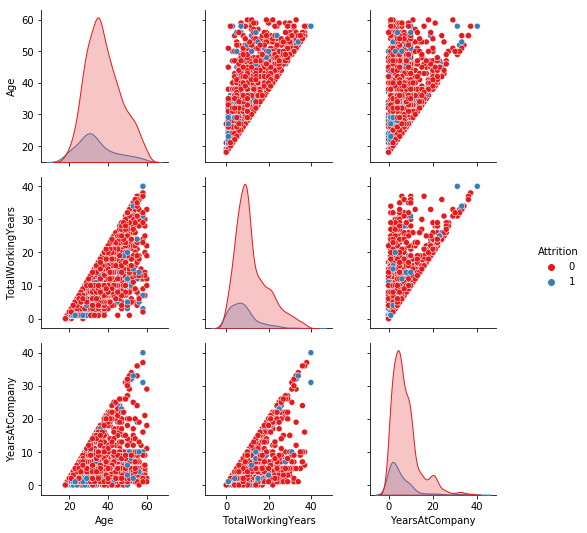

In [35]:
# method of pairplot in seaborn used here for multi variate analysis
sns.pairplot(Attrition_Data[['Attrition','Age','TotalWorkingYears','YearsAtCompany']],hue='Attrition',palette='Set1')

* **Similar inference can be drawn from these variables: Age, TotalWorkingYears, YearsAtCompany, that more people in their early years of career are leaving for other opportunities**


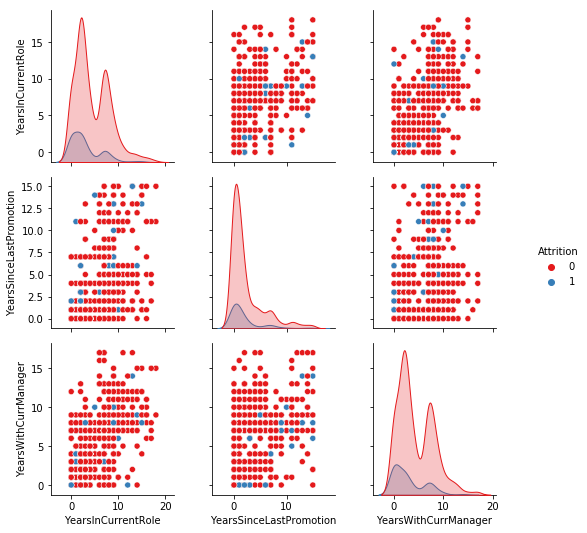

In [36]:
# method of pairplot in seaborn used here for multi variate analysis
sns.pairplot(Attrition_Data[['Attrition','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']],hue='Attrition',palette='Set1')

* **Even in these plots shown above, inference can be drawn from these variables: YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, that more people in their early years of work are leaving**


#### These variables provide same inference and are probably redundant in nature


---

---


## Let's explore a few other variables involving satisfaction ratings

### Hypothesis behind these:
#### People rating low on satisfaction could leave the company 

### For variable : JobSatisfaction

In [37]:
# using pandas crosstab to see the proportion given that Attrition = 0 and 1
(pd.crosstab(index=Attrition_Data['Attrition'], columns=Attrition_Data['JobSatisfaction'],margins=True,normalize='index')*100).round(2)

JobSatisfaction,1,2,3,4
Attrition,,,,
0,18.09,18.98,29.93,33.01
1,27.85,19.41,30.80,21.94
All,19.66,19.05,30.07,31.22


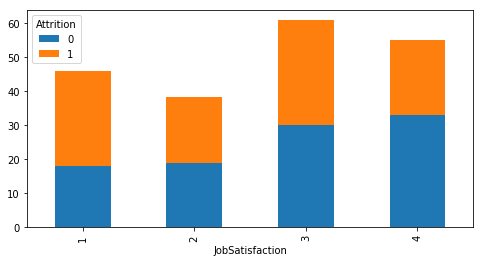

In [38]:
# plotting above figures with some modification to bring out a better plot
(pd.crosstab(index=Attrition_Data['JobSatisfaction'], columns=Attrition_Data['Attrition'],normalize='columns')*100).round(2).plot(kind='bar',stacked=True)

### For variable : EnvironmentSatisfaction

In [39]:
# using pandas crosstab to see the proportion given that Attrition = 0 and 1
(pd.crosstab(index=Attrition_Data['Attrition'], columns=Attrition_Data['EnvironmentSatisfaction'],margins=True,normalize='index')*100).round(2)

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
0,17.19,19.79,31.71,31.31
1,30.38,18.14,26.16,25.32
All,19.32,19.52,30.82,30.34


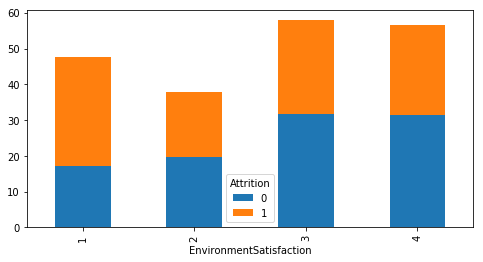

In [40]:
# plotting above figures with some modification to bring out a better plot
(pd.crosstab(index=Attrition_Data['EnvironmentSatisfaction'], columns=Attrition_Data['Attrition'],normalize='columns')*100).round(2).plot(kind='bar',stacked=True)

* **For the above variables Attrition is relatively higher at lower satisfaction levels, but the distribution does not suggest a big contribution to the cause of attrition**
* **Though we observe people at higher satisfaction level, relatively people tend to stay more**
#### Hence, they can be considered variables that are contributing to Attrition but not much compared to above variables

# SUMMARY

* Attrition is observed in the lower **Age** group

* **Monthly Income** affects attrition. The lower the monthly income, higher the chance of leaving, as observed across different categories

* Attrition is observed in Singles under **MaritalStatus** while married are observed to stay more.

* Attrition is observed in the lower **JobLevel**

* **TotalWorkingYears:** High attrition with persons having less than 2 TotalWorkingYears. Also it appears, immeditely after appointment to current role i.e. through promotion or hiring, people are leaving within few months. A similar conclusion is observed in the other parameters ie.YearsInCurrentRole, YearsAtCompany and YearsWithCurrManager

* **Overtime** may affect Attrition with those 

